In [ ]:
#Question 1

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('USA_Housing.csv')

In [3]:
X=df.iloc[:,0:5]
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947
...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103
4996,78491.27543,6.999135,6.576763,4.02,25616.11549
4997,63390.68689,7.250591,4.805081,2.13,33266.14549
4998,68001.33124,5.534388,7.130144,5.44,42625.62016


In [4]:
Y=df.iloc[:,-1]
Y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled= np.insert(X_scaled, 0, values=1, axis=1)

In [8]:
accuracy = 0

In [9]:
#Cross Validation Fold 1
import numpy as np
X_train=X_scaled[:4000,:]
X_test=X_scaled[4000:5000,:]
Y_train=Y[:4000]
Y_test=Y[4000:5000]
Y_train=(np.array(Y_train)).reshape(-1,1)
Y_test=(np.array(Y_test)).reshape(-1,1)

In [10]:
#Find Beta Matrix
import numpy as np
A=X_train.T.dot(X_train)
B=np.linalg.inv(A)
C=B.dot(X_train.T)
D1=C.dot(Y_train)
print(D1)

[[1233028.38536437]
 [ 230778.59921985]
 [ 163755.13607252]
 [ 121885.1351222 ]
 [   1247.01304382]
 [ 150084.29759618]]


In [11]:
y_predict=X_test.dot(D1)
print(y_predict)

[[1457655.14509262]
 [1298104.16714786]
 [1650238.22147915]
 [1605071.83890936]
 [1404788.08286058]
 [1543416.35563577]
 [1364105.23837493]
 [1464953.62802342]
 [1094094.64619444]
 [1158087.94530995]
 [1511152.56199185]
 [1046492.34578515]
 [1146556.39584728]
 [1259132.86913504]
 [ 951852.22073643]
 [1336707.0374408 ]
 [1625733.18779646]
 [1292949.70767621]
 [1331550.41492348]
 [1741540.8736312 ]
 [1169156.93563025]
 [1635074.26335467]
 [1413875.04178438]
 [1262012.73379097]
 [1385644.43638768]
 [ 859121.05235639]
 [ 798820.59132736]
 [ 915218.74460299]
 [ 942636.20977044]
 [1506585.09649504]
 [1848833.64327817]
 [1244268.717695  ]
 [1592507.19031079]
 [ 887720.74173755]
 [ 504984.73986602]
 [ 657861.75613857]
 [1422024.01677379]
 [1533974.6363799 ]
 [1188949.94231217]
 [1657671.33609735]
 [ 839103.44475237]
 [1078152.94258651]
 [1161935.02701188]
 [1145551.70447918]
 [1160261.74446638]
 [1251304.61747991]
 [1194844.85231176]
 [ 967996.37835262]
 [1126122.20316288]
 [1329182.47617701]


In [12]:
#Mean Square error and accuracy
error=Y_test-y_predict
print(error.shape)
square_error=np.power(error,2)
sum_square_error=np.sum(square_error)
print(sum_square_error/len(y_predict))
y_mean=np.mean(Y_test)
total_variance=np.sum((Y_test-y_mean)**2)
accuracy += 1-sum_square_error/total_variance
print(1-sum_square_error/total_variance)

(1000, 1)
10415367206.82634
0.9138111758717494


In [13]:
#Cross Validation Fold 2
import numpy as np
X_train1=X_scaled[:3000,:]
X_train2=X_scaled[4000:5000,:]
X_train=np.append(X_train1,X_train2,axis=0)
X_test=X_scaled[3000:4000,:]
Y_train1=Y[:3000]
Y_train2=Y[4000:]
Y_train=np.append(Y_train1,Y_train2,axis=0)
Y_test=Y[3000:4000]
Y_train=(np.array(Y_train)).reshape(-1,1)
Y_test=(np.array(Y_test)).reshape(-1,1)

In [14]:
import numpy as np
A=X_train.T.dot(X_train)
B=np.linalg.inv(A)
C=B.dot(X_train.T)
D2=C.dot(Y_train)
print(D2)

[[1.23144707e+06]
 [2.29921558e+05]
 [1.64523054e+05]
 [1.19737507e+05]
 [1.12425659e+03]
 [1.51317802e+05]]


In [15]:
y_predict=X_test.dot(D2)
print(y_predict)

[[1448013.87496855]
 [1302297.98769045]
 [1356989.1983947 ]
 [1024678.57396309]
 [1433160.35841733]
 [ 689736.08918579]
 [1654085.16737836]
 [1750351.97438972]
 [1080163.83675324]
 [1378338.15831883]
 [ 574120.59522687]
 [1295805.16899164]
 [1614999.60263853]
 [1289275.18012125]
 [1024023.61189915]
 [1345757.24355485]
 [1501306.90320289]
 [1495057.97901345]
 [1152258.08515341]
 [1089619.76939195]
 [1309044.06588223]
 [1286412.2413862 ]
 [1814703.56541386]
 [2123082.02593582]
 [1393390.1097223 ]
 [ 875429.48642398]
 [1378263.63736203]
 [1626436.19836037]
 [1227749.37814889]
 [1365054.72687377]
 [1005596.51941615]
 [1290919.26647491]
 [1493230.48054068]
 [ 861157.9921263 ]
 [1831177.12550832]
 [1700511.22691728]
 [1299775.77572087]
 [ 834569.7684684 ]
 [ 948674.67498631]
 [1127732.62609894]
 [ 893673.15832414]
 [1199915.38123817]
 [1077643.71364022]
 [ 752591.71583495]
 [1090817.19147127]
 [1303733.32720858]
 [1253030.31627291]
 [1069522.43984815]
 [1321932.08243293]
 [ 920940.57103319]


In [16]:
error=Y_test-y_predict
print(error.shape)
square_error=np.power(error,2)
sum_square_error=np.sum(square_error)
print(sum_square_error/len(y_predict))
y_mean=np.mean(Y_test)
total_variance=np.sum((Y_test-y_mean)**2)
accuracy += 1-sum_square_error/total_variance
print(1-sum_square_error/total_variance)

(1000, 1)
10176314743.92621
0.9208503836977656


In [17]:
#Cross Validation Fold 3
import numpy as np
X_train1=X_scaled[:2000,:]
X_train2=X_scaled[3000:5000,:]
X_train=np.append(X_train1,X_train2,axis=0)
X_test=X_scaled[2000:3000,:]
Y_train1=Y[:2000]
Y_train2=Y[3000:]
Y_train=np.append(Y_train1,Y_train2,axis=0)
Y_test=Y[2000:3000]
Y_train=(np.array(Y_train)).reshape(-1,1)
Y_test=(np.array(Y_test)).reshape(-1,1)

In [18]:
A=X_train.T.dot(X_train)
B=np.linalg.inv(A)
C=B.dot(X_train.T)
D3=C.dot(Y_train)
print(D3)

[[1231448.09063371]
 [ 230730.20810582]
 [ 163554.55706976]
 [ 121669.08713233]
 [   2620.25215054]
 [ 150923.12489298]]


In [19]:
y_predict=X_test.dot(D3)
print(y_predict)

[[1231513.14886101]
 [1321188.78204718]
 [ 725691.26810135]
 [ 932558.61953863]
 [1049638.8423876 ]
 [1117792.169465  ]
 [ 699809.9899892 ]
 [1283202.33184976]
 [1449238.57178016]
 [1624951.44906873]
 [1830848.57926868]
 [1242649.34621863]
 [1210706.94443784]
 [ 896076.85897561]
 [1253715.05080186]
 [1589472.28056382]
 [ 928896.95960008]
 [ 250063.21203873]
 [1365038.62630567]
 [ 936630.15198787]
 [1463875.02234695]
 [ 749424.62715119]
 [1667477.50953431]
 [ 998159.02130739]
 [ 970325.82779316]
 [ 573081.70909738]
 [1541109.00744573]
 [1330273.78875683]
 [1187952.13853527]
 [2075817.91954476]
 [ 870316.85253847]
 [1457498.55657956]
 [1314368.18471005]
 [1590391.6033931 ]
 [1266820.62629774]
 [1066363.33746692]
 [1132272.99921751]
 [ 786556.52888475]
 [1126937.15042759]
 [1245724.72756982]
 [1768217.80885668]
 [ 671159.39117195]
 [1229061.2109537 ]
 [1399601.24562253]
 [1142854.62875621]
 [1220245.06194569]
 [1325950.85208369]
 [1658828.63278111]
 [ 927655.78891484]
 [ 665038.53594979]


In [20]:
error=Y_test-y_predict
print(error.shape)
square_error=np.power(error,2)
sum_square_error=np.sum(square_error)
print(sum_square_error/len(y_predict))
y_mean=np.mean(Y_test)
total_variance=np.sum((Y_test-y_mean)**2)
accuracy += 1-sum_square_error/total_variance
print(1-sum_square_error/total_variance)

(1000, 1)
9861616305.46194
0.9152429915320014


In [22]:
#Cross Validation Fold 4
X_train1=X_scaled[:1000,:]
X_train2=X_scaled[2000:,:]
X_train=np.append(X_train1,X_train2,axis=0)
X_test=X_scaled[1000:2000,:]
Y_train1=Y[:1000]
Y_train2=Y[2000:]
Y_train=np.append(Y_train1,Y_train2,axis=0)
Y_test=Y[1000:2000]
Y_train=(np.array(Y_train)).reshape(-1,1)
Y_test=(np.array(Y_test)).reshape(-1,1)

In [23]:
A=X_train.T.dot(X_train)
B=np.linalg.inv(A)
C=B.dot(X_train.T)
D4=C.dot(Y_train)
print(D4)

[[1232586.40453402]
 [ 228365.32287054]
 [ 165201.14881927]
 [ 122539.46855211]
 [   1697.03433458]
 [ 150055.81710562]]


In [24]:
y_predict=X_test.dot(D4)
print(y_predict)

[[ 950080.82206093]
 [ 711724.26608798]
 [1770455.57819769]
 [ 764563.88271977]
 [1572061.16316271]
 [1317591.12280027]
 [1604930.7177251 ]
 [1759195.78943922]
 [1169222.38871881]
 [1431814.21935315]
 [1499538.56522023]
 [1341168.59871483]
 [1375149.91419856]
 [1405838.13193487]
 [1503218.88005213]
 [1848993.40521188]
 [1950500.92757011]
 [ 790658.38349116]
 [1190896.15599901]
 [1156468.95013955]
 [1267826.58554619]
 [1718149.71836485]
 [ 555011.64109618]
 [ 747482.33138753]
 [ 768207.63242427]
 [1124282.36925491]
 [1529826.94616795]
 [1754156.80533026]
 [1100222.13541817]
 [1329252.53932286]
 [1348093.65456371]
 [1486540.20018588]
 [1327911.08267484]
 [1436053.94607928]
 [1066299.26103231]
 [1353766.3907889 ]
 [1027101.14990834]
 [ 896561.25325758]
 [ 594610.41612626]
 [1491867.95632144]
 [ 908007.11467791]
 [1581286.7280654 ]
 [1665374.27725999]
 [1316450.51345274]
 [1367829.49347562]
 [1568361.59536923]
 [1361139.95705265]
 [1135124.72547678]
 [1004641.28638481]
 [1563938.32811944]


In [25]:
error=Y_test-y_predict
print(error.shape)
square_error=np.power(error,2)
sum_square_error=np.sum(square_error)
print(sum_square_error/len(y_predict))
y_mean=np.mean(Y_test)
total_variance=np.sum((Y_test-y_mean)**2)
accuracy += 1-sum_square_error/total_variance
print(1-sum_square_error/total_variance)

(1000, 1)
10728109153.419218
0.920301549640113


In [27]:
#Cross Validation Fold 5
X_train=X_scaled[1000:,:]
X_test=X_scaled[:1000,:]
Y_train=Y[1000:]
Y_test=Y[:1000]
Y_train=(np.array(Y_train)).reshape(-1,1)
Y_test=(np.array(Y_test)).reshape(-1,1)

In [28]:
import numpy as np
A=X_train.T.dot(X_train)
B=np.linalg.inv(A)
C=B.dot(X_train.T)
D5=C.dot(Y_train)
print(D5)

[[1231872.07704612]
 [ 229923.70318635]
 [ 164052.98579011]
 [ 120923.57426579]
 [   3533.77470973]
 [ 151855.58542488]]


In [29]:
y_predict=X_test.dot(D5)
print(y_predict)

[[1222472.59789716]
 [1494131.15197358]
 [1253670.80242078]
 [1120389.19877662]
 [ 844315.19005474]
 [1068260.55667213]
 [1671245.639246  ]
 [1567875.18249614]
 [ 763347.28814599]
 [1470721.64690957]
 [1775501.83443543]
 [ 630026.09214137]
 [ 950539.75749648]
 [1303433.26478986]
 [1306505.35508872]
 [1237586.54456661]
 [1521433.87536906]
 [ 488187.16489613]
 [1137920.58807016]
 [1203167.64046499]
 [2019384.21819711]
 [1076240.13702178]
 [ 734801.62065626]
 [ 997288.25431527]
 [ 900094.94841917]
 [1473156.57255351]
 [1237124.03621889]
 [ 930137.78874904]
 [1405712.96683316]
 [1373314.62542769]
 [1246117.10168385]
 [1224015.69281346]
 [1234384.89038389]
 [ 611159.97921256]
 [ 937440.62317097]
 [1274345.51392185]
 [1330861.45766804]
 [1161935.74224449]
 [ 525180.40929258]
 [  97206.19765112]
 [ 929627.49901683]
 [1714160.39150958]
 [ 792704.11688002]
 [1611877.74359594]
 [ 943225.3232602 ]
 [1443933.98877536]
 [1222266.83903772]
 [1070537.83047054]
 [1228326.71172751]
 [1744277.04002954]


In [30]:
error=Y_test-y_predict
print(error.shape)
square_error=np.power(error,2)
sum_square_error=np.sum(square_error)
print(sum_square_error/len(y_predict))
y_mean=np.mean(Y_test)
total_variance=np.sum((Y_test-y_mean)**2)
accuracy += 1-sum_square_error/total_variance
print(1-sum_square_error/total_variance)

(1000, 1)
10087104444.118814
0.9175899480765107


In [ ]:
#Average Accuracy on Training Data

In [31]:
print(accuracy/5)

0.9175592097636281


In [ ]:
#Model Evaluation

In [32]:
X_train=X_scaled[:3500,:]
X_test=X_scaled[3500:5000,:]
Y_train=Y[:3500]
Y_test=Y[3500:5000]
Y_train=(np.array(Y_train)).reshape(-1,1)
Y_test=(np.array(Y_test)).reshape(-1,1)

In [33]:
y_predict=X_test.dot(D2)
print(y_predict)

[[ 854827.76479024]
 [1281641.86868854]
 [2013490.16147134]
 ...
 [1025021.77734944]
 [1262205.87983883]
 [1302088.08443965]]


In [34]:
error=Y_test-y_predict
print(error.shape)
square_error=np.power(error,2)
sum_square_error=np.sum(square_error)
print(sum_square_error/len(y_predict))
y_mean=np.mean(Y_test)
total_variance=np.sum((Y_test-y_mean)**2)
print(1-sum_square_error/total_variance)

(1500, 1)
10176167895.509495
0.917786034446557


In [ ]:
#Question 2

In [39]:
X=df.iloc[:,0:5]
Y=df.iloc[:,5]
Y=np.array(Y)
Y=Y.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [40]:
from sklearn.model_selection import train_test_split
X_intermediate, X_test, Y_intermediate, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_intermediate,Y_intermediate,test_size=0.2,random_state=42)
print(Y_validation.shape)

(700, 1)


In [41]:
beta=np.zeros((6,4))
number_of_iterations=100
learning_rate=[0.001,0.01,0.1,1]
n=len(df)
for k in range(len(learning_rate)):
    for i in range(number_of_iterations):
        x0_gradient=0
        x1_gradient=0
        x2_gradient=0
        x3_gradient=0
        x4_gradient=0
        x5_gradient=0    
        for j in range(len(X_train)):
            a=X_train[j,0]
            b=X_train[j,1]
            c=X_train[j,2]
            d=X_train[j,3]
            e=X_train[j,4]
            f=Y_train[j]
            x0_gradient+=(beta[0][k]+(beta[1][k]*a)+(beta[2][k]*b)+(beta[3][k]*c)+(beta[4][k]*d)+(beta[5][k]*e)-f)
            x1_gradient+=((beta[0][k]+(beta[1][k]*a)+(beta[2][k]*b)+(beta[3][k]*c)+(beta[4][k]*d)+(beta[5][k]*e)-f)*a)
            x2_gradient+=((beta[0][k]+(beta[1][k]*a)+(beta[2][k]*b)+(beta[3][k]*c)+(beta[4][k]*d)+(beta[5][k]*e)-f)*b)
            x3_gradient+=((beta[0][k]+(beta[1][k]*a)+(beta[2][k]*b)+(beta[3][k]*c)+(beta[4][k]*d)+(beta[5][k]*e)-f)*c)
            x4_gradient+=((beta[0][k]+(beta[1][k]*a)+(beta[2][k]*b)+(beta[3][k]*c)+(beta[4][k]*d)+(beta[5][k]*e)-f)*d)
            x5_gradient+=((beta[0][k]+(beta[1][k]*a)+(beta[2][k]*b)+(beta[3][k]*c)+(beta[4][k]*d)+(beta[5][k]*e)-f)*e)
        beta[0][k]=beta[0][k]-((learning_rate[k]/n)*x0_gradient)
        beta[1][k]=beta[1][k]-((learning_rate[k]/n)*x1_gradient)
        beta[2][k]=beta[2][k]-((learning_rate[k]/n)*x2_gradient)
        beta[3][k]=beta[3][k]-((learning_rate[k]/n)*x3_gradient)
        beta[4][k]=beta[4][k]-((learning_rate[k]/n)*x4_gradient)
        beta[5][k]=beta[5][k]-((learning_rate[k]/n)*x5_gradient)
print(beta)

[[  67133.53630358  529329.43227428 1228654.4243101  1232618.32011841]
 [  12589.61696567   99003.272281    229235.11954318  230067.9889464 ]
 [   8683.53334913   68841.91685442  162993.67784305  163710.33259401]
 [   8194.33276617   58621.16538896  118985.55459136  121681.42752284]
 [   4810.52859515   28672.72378661    5954.61215367    2832.15066521]
 [   7239.00498571   59053.06185437  149987.90210255  150657.52262836]]


In [42]:
beta=pd.DataFrame(data=beta)
print(beta[0])

0    67133.536304
1    12589.616966
2     8683.533349
3     8194.332766
4     4810.528595
5     7239.004986
Name: 0, dtype: float64


In [43]:
X_validation=np.insert(X_validation,0,values=1,axis=1)
X_test=np.insert(X_test,0,values=1,axis=1)

In [44]:
import sklearn
from sklearn import metrics
for i in range(len(learning_rate)):
    validation_error=metrics.r2_score(Y_validation,X_validation.dot(beta[i]))    
    test_error=metrics.r2_score(Y_test,X_test.dot(beta[i]))
    print(validation_error,test_error)

-10.499535644463432 -11.570154129396213
-3.2391364999526324 -3.639254194674658
0.910087841876989 0.9143255087986946
0.9097995626742028 0.9147570103083724


In [ ]:
#Question 3

In [ ]:
#Part 1

In [45]:
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]
df1 = pd.read_csv('imports-85.data',header=None, names=headers, na_values="?")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [46]:
df1['engine_type'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: engine_type, dtype: int64

In [ ]:
#Part 2

<AxesSubplot:>

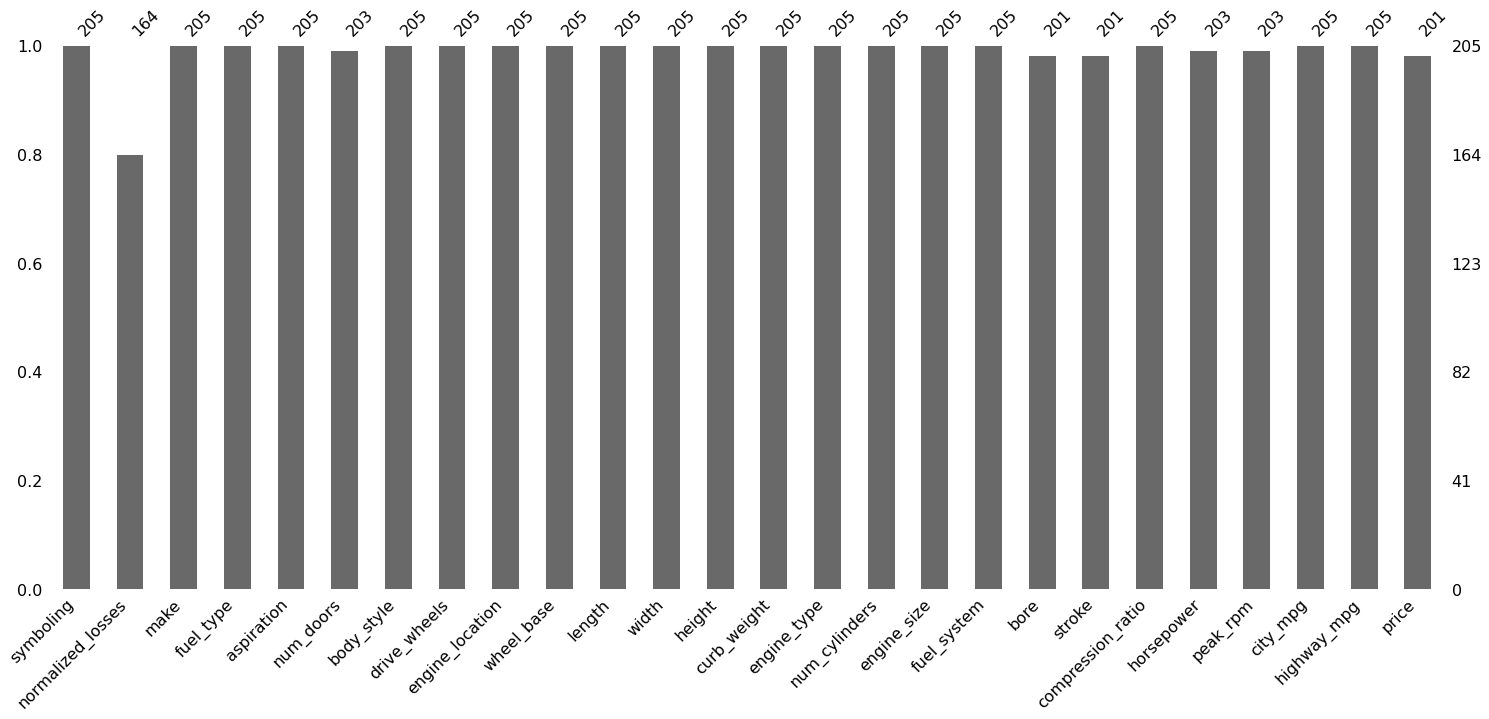

In [53]:
import missingno as msn
msn.bar(df1)

In [57]:
from sklearn.impute import SimpleImputer
mean_imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
df1[["normalized_losses"]]=mean_imputer.fit_transform(df1[["normalized_losses"]])
df1[["bore"]]=mean_imputer.fit_transform(df1[["bore"]])
df1[["stroke"]]=mean_imputer.fit_transform(df1[["stroke"]])
df1[["peak_rpm"]]=mean_imputer.fit_transform(df1[["peak_rpm"]])
df1[["city_mpg"]]=mean_imputer.fit_transform(df1[["city_mpg"]])
df1[["horsepower"]]=mean_imputer.fit_transform(df1[["horsepower"]])

mode_imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df1[["num_doors"]]=mode_imputer.fit_transform(df1[["num_doors"]])
df1= df1.dropna(subset=['price'])

In [ ]:
#Part 3

<AxesSubplot:>

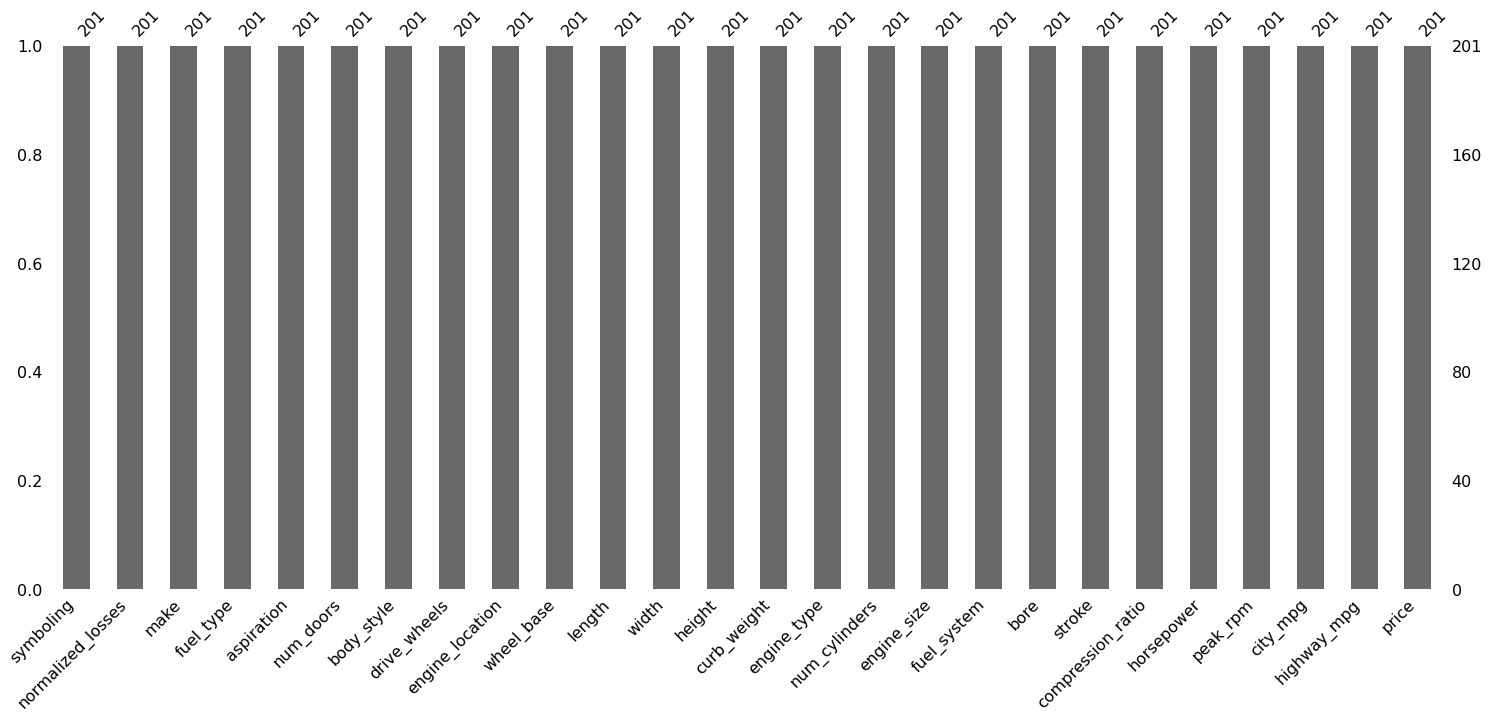

In [58]:
msn.bar(df1)

In [59]:
#(i)
cleanup_nums = {"num_doors":     {"four": 4, "two": 2},
                "num_cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}
df1 = df1.replace(cleanup_nums)

In [60]:
#(ii)
df1=pd.get_dummies(df1, columns=["body_style", "drive_wheels"], prefix=["body", "drive"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_doors          201 non-null    int64  
 6   engine_location    201 non-null    object 
 7   wheel_base         201 non-null    float64
 8   length             201 non-null    float64
 9   width              201 non-null    float64
 10  height             201 non-null    float64
 11  curb_weight        201 non-null    int64  
 12  engine_type        201 non-null    object 
 13  num_cylinders      201 non-null    int64  
 14  engine_size        201 non-null    int64  
 15  fuel_system        201 non-null    object 
 16  bore               201 non

In [61]:
#(iii)
from sklearn.preprocessing import LabelEncoder

ord_enc = LabelEncoder()
df1["make"] = ord_enc.fit_transform(df1[["make"]])
df1["aspiration"] = ord_enc.fit_transform(df1[["aspiration"]])
df1["engine_location"] = ord_enc.fit_transform(df1[["engine_location"]])
df1["fuel_type"] = ord_enc.fit_transform(df1[["fuel_type"]])

D:\Applications\Anaconda\New folder\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    float64
 2   make               201 non-null    int32  
 3   fuel_type          201 non-null    int32  
 4   aspiration         201 non-null    int32  
 5   num_doors          201 non-null    int64  
 6   engine_location    201 non-null    int32  
 7   wheel_base         201 non-null    float64
 8   length             201 non-null    float64
 9   width              201 non-null    float64
 10  height             201 non-null    float64
 11  curb_weight        201 non-null    int64  
 12  engine_type        201 non-null    object 
 13  num_cylinders      201 non-null    int64  
 14  engine_size        201 non-null    int64  
 15  fuel_system        201 non-null    object 
 16  bore               201 non

In [63]:
#(iv)
df1['fuel_system'].value_counts()
df1["fuel_system"] = np.where(df1["fuel_system"].str.contains("pfi"), 1,0)

In [64]:
df1['fuel_system'].value_counts()

0    108
1     93
Name: fuel_system, dtype: int64

In [65]:
#(v)
df1['engine_type'].value_counts()
df1["engine_type"] = np.where(df1["engine_type"].str.contains("ohc"), 1,0)

In [66]:
df1['engine_type'].value_counts()

1    185
0     16
Name: engine_type, dtype: int64

In [67]:
#Part4
X1=df1.iloc[:,:22]
X2=df1.iloc[:,24:]
X=np.append(X1,X2,axis=1)
Y=df1.iloc[:,23]
Y=np.array(Y).reshape(-1,1)

In [68]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [69]:
#Part 5

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=33)

In [71]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [72]:
pred=model.predict(X_test)

In [73]:
from sklearn import metrics
print(metrics.mean_squared_error(pred,y_test))
print(metrics.mean_absolute_error(pred,y_test))
print(np.sqrt(metrics.mean_squared_error(pred,y_test)))
print(metrics.r2_score(y_test, pred))

15134209.519775549
2667.9678578817284
3890.2711370514457
0.8180914382241553


In [ ]:
#Part 6

In [74]:
import sklearn
from sklearn.decomposition import PCA
pca=PCA(n_components=27)
X_scaled1=pca.fit_transform(X_scaled)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled1, Y, test_size=0.3, random_state=33)

In [76]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [77]:
pred=model.predict(X_test)

In [78]:
from sklearn import metrics
print(metrics.mean_squared_error(pred,y_test))
print(metrics.mean_absolute_error(pred,y_test))
print(np.sqrt(metrics.mean_squared_error(pred,y_test)))
print(metrics.r2_score(y_test, pred))

15020204.155746752
2707.5176023954764
3875.5908137659158
0.819461747772078
